# Интернет-магазин "Стримчик"

## Описание

**«Стримчик»** - интернет-магазин, который продаёт по всему миру компьютерные игры. 

Нам предоставлены данные по продажам игр до 2016 года. В этих данных представленны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель проекта** - найти закономерности, которые влияют на успешность игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## 1. Знакомство с данными

Для дальнейшего анализа импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv') 
except:
    df = pd.read_csv('games.csv')
df.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Дополнительно добавим расшифровку столбцов, согласно предоставленной документации к данным.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Вывод 1.** В таблице 16715 строк. В 5 из 11 колонок датасета имеются пропущенные значения. Данные предоставленны с 1980 по 2016 год.

## 2. Предобработка данных.

Все названия колонок приведены с заглавных букв. Приведем все названия столбцов к нижнему регистру.

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df = df.rename(columns = str.lower)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверим наличие явных дубликатов и при необходимости удалим их.

In [7]:
df.duplicated().sum()

0

Проверим количество пропущенных значений в датасете.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Имеются пропущенные значения в столбцах name, year_of_release, critic_score, user_score и rating.
Исследуем каждый столбец по порядку

In [9]:
df['name'].unique() 

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Так как пропущенных значений всего 2, то избавися от них.

In [10]:
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проверим столбец year_of_release на пропуски, а также их долю в датасете.

In [11]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
df['year_of_release'].isna().sum()/16714

0.01609429221012325

Так как доля пробущенных значений составляет менее 2%, то удалим данные пропуски.

In [13]:
df = df.dropna(subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проверим столбец genre

In [14]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Так как пропущенных значений всего 2, то удалим их из датасета

In [15]:
df = df.dropna(subset=['genre'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проверим столбец с оценками критиков (critic_score)

In [16]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Так как пропущенно более половины данных, на данном этане не будем заменять пропуски на числовые значения и прочие метрики. Пропуски могут быть связаны с тем, что половину игр критики не оценили вообще. 

Рассмотрим столбец с оценками пользователей (user_score).

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди уникальных значений имеется "tbd". Возможно, подразумевается, что пользователи еще только начали играть в данную игру и для постановки оценки требуется время на прохождение игры, поэтому оценку еще требуется определить. Проверим долю оценки tbd

In [18]:
df.groupby('user_score')['user_score'].count()

user_score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       5
9.6       2
9.7       1
tbd    2376
Name: user_score, Length: 96, dtype: int64

In [19]:
2424/16715

0.1450194436135208

Доля tbd составляет 14%. Чтобы далее исследовать данные, заменим данное значение и пропущенные на NaN.

In [20]:
df['user_score'] = df['user_score'].fillna('NaN')
df['user_score'] = df['user_score'].replace('tbd','NaN')
df['user_score'].unique()

array(['8', 'NaN', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

Проверим столбец rating

In [21]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинг по системе ESRB Распространен в США и Канаде. Вероятно, в других странах данный рейтинг не распространяется, в связи с наличием локальных разработчиков и платформ. По скольку значений пропущенно более чем половина, на данном этапе заменим пропуски на значение "unknown_rating"

In [22]:
df['rating'] = df['rating'].fillna('unknown_rating')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Далее приведем столбцы year_of_release и critic_score к целочисленному типу, так как первый обозначает год, а второй оценку критиков (при этом дробные значения там отстутствовали).

In [23]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


С учетом рассмотренных факторов, предобработка данных проведена. 

Далее рассчитаем суммарные продажи во всех регионах и добавим в отдельный столбец.

In [24]:
df['all_regions_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] #добавляем столбец по суммарным продажам во всех регионах
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown_rating,31.38


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16444 non-null  object 
 1   platform           16444 non-null  object 
 2   year_of_release    16444 non-null  int64  
 3   genre              16444 non-null  object 
 4   na_sales           16444 non-null  float64
 5   eu_sales           16444 non-null  float64
 6   jp_sales           16444 non-null  float64
 7   other_sales        16444 non-null  float64
 8   critic_score       7983 non-null   float64
 9   user_score         7463 non-null   float64
 10  rating             16444 non-null  object 
 11  all_regions_sales  16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод 2.** С учетом полученной инфомрации данные предобработаны. Дополнительно добавлен столбец по суммарным продажам во всех регионах.

In [26]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16444 non-null  object 
 1   platform           16444 non-null  object 
 2   year_of_release    16444 non-null  int64  
 3   genre              16444 non-null  object 
 4   na_sales           16444 non-null  float64
 5   eu_sales           16444 non-null  float64
 6   jp_sales           16444 non-null  float64
 7   other_sales        16444 non-null  float64
 8   critic_score       7983 non-null   float64
 9   user_score         7463 non-null   float64
 10  rating             16444 non-null  object 
 11  all_regions_sales  16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shi

## 3. Исследование данных.

Для дальнешего исследования факторов влияния на успех продаж игр, рассмотрим колличество игр, выпущенных в разные годы. 

Text(0, 0.5, 'Сумма вырущенных игр')

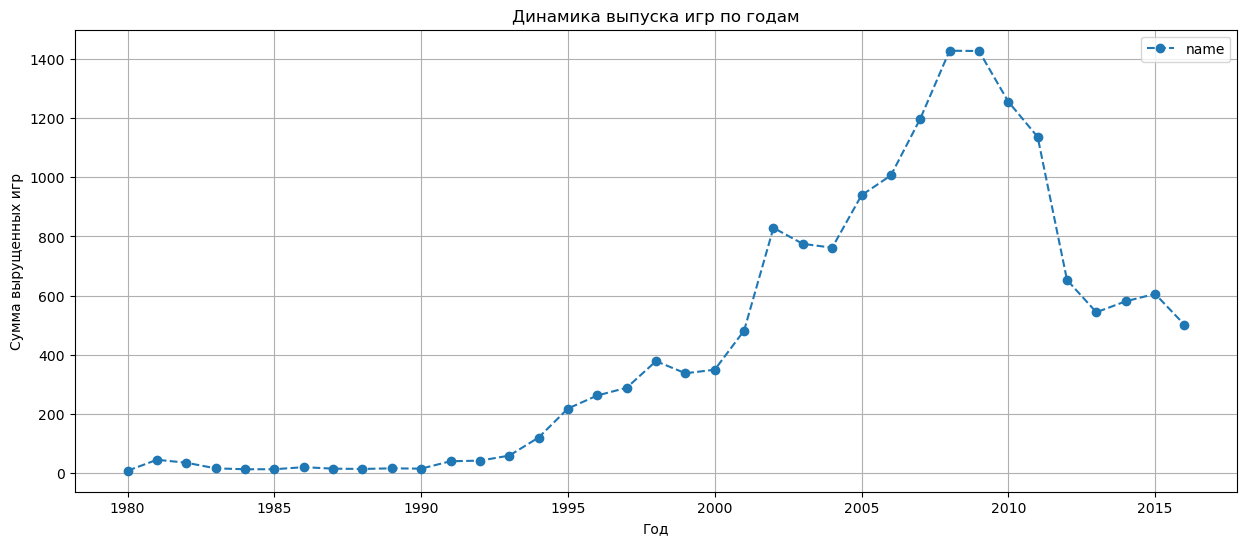

In [27]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Сумма вырущенных игр')

Из графика мы видим, что рост игр начинается в период с 1994 года и резкий рост с 2000 года, достигая пиковых значений в 2008 и 2009, соответственно. При этом количество проданных игр начинает уменьшаться с 2010 года.

На данном этапе рассмотрим, как менялись продажи игр по платформам. для начала выберем платформы с наибольшими суммарными продажами.

In [28]:
df['platform'].unique()#выведем названия всех платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [29]:
len(df['platform'].unique())#посчитаем количество уникальных значений

31

In [30]:
df_all_platforms_sales=df.pivot_table(index='platform', values = 'all_regions_sales', aggfunc='sum')
df_all_platforms_sales.sort_values(by = 'all_regions_sales',ascending=False).style.bar()

,all_regions_sales
platform,
PS2,1233.560000
X360,961.240000
PS3,931.340000
Wii,891.180000
DS,802.780000
PS,727.580000
PS4,314.140000
GBA,312.880000
PSP,289.530000


Из даннных видно, что
1. ТОП-6 игровых платформ за все время, предоставленных в датасете, с сумарным количеством продаж более 500 млн. копий: PS2, X360, Wii, PS3, DS, PS.
2. 12 платформ имеют количество продаж от 100 до 500 млн копий.

Для начала выдем график ТОП-6 игр по количеству проданных копий (более 500 млн. шт)

Text(0, 0.5, 'Сумма проданных копий млн. штук')

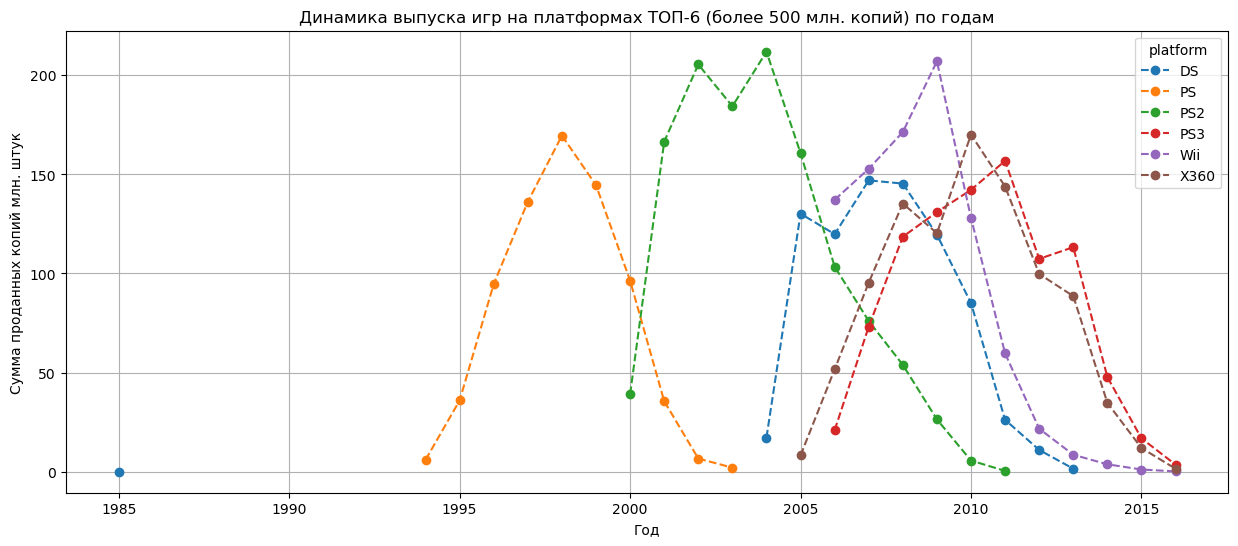

In [31]:
top_6_platform = df.query('platform in ["PS2", "X360", "Wii", "PS3","DS", "PS"]')
top_6_platform.pivot_table(index='year_of_release', 
                           columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика выпуска игр на платформах ТОП-6 (более 500 млн. копий) по годам')
plt.xlabel('Год')
plt.ylabel('Сумма проданных копий млн. штук')

На графике мы видим выбивающееся (аномальное) значение по продажам игр на платформе DS. На графифике видно, что старт продаж игр на данной платформе начинается с 2004 года. Проверим данные по DS за 1985 год.

In [32]:
top_6_platform.query('year_of_release == 1985 and platform =="DS"').head(100)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown_rating,0.02


Из данных видно, что в 1985 году на платформу DS была выпущенна 1 игра, котора продавалась только в Японии (всего было продано 20 тыс. экземпляров копий). 

Учитывая, что на других рынках она не продавалась, и полностью отсутствуют информация об оценках пользователей и критиков, можно предположить 2 варианта.
1) Игра на DS 1985 непользовались спросом на мировом рынке, поэтому больше инфомрации о ней нет.
2) Это единичная аномалия и ее можно исключить из исследования.

Предлагаем исключить данну строку из иссленования.

In [33]:
df = df.drop(labels = [15957],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16443 non-null  object 
 1   platform           16443 non-null  object 
 2   year_of_release    16443 non-null  int64  
 3   genre              16443 non-null  object 
 4   na_sales           16443 non-null  float64
 5   eu_sales           16443 non-null  float64
 6   jp_sales           16443 non-null  float64
 7   other_sales        16443 non-null  float64
 8   critic_score       7983 non-null   float64
 9   user_score         7463 non-null   float64
 10  rating             16443 non-null  object 
 11  all_regions_sales  16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Строка удалена. Теперь еще раз построим график по ТОП-6 платформам.

Text(0, 0.5, 'Сумма проданных копий млн. штук')

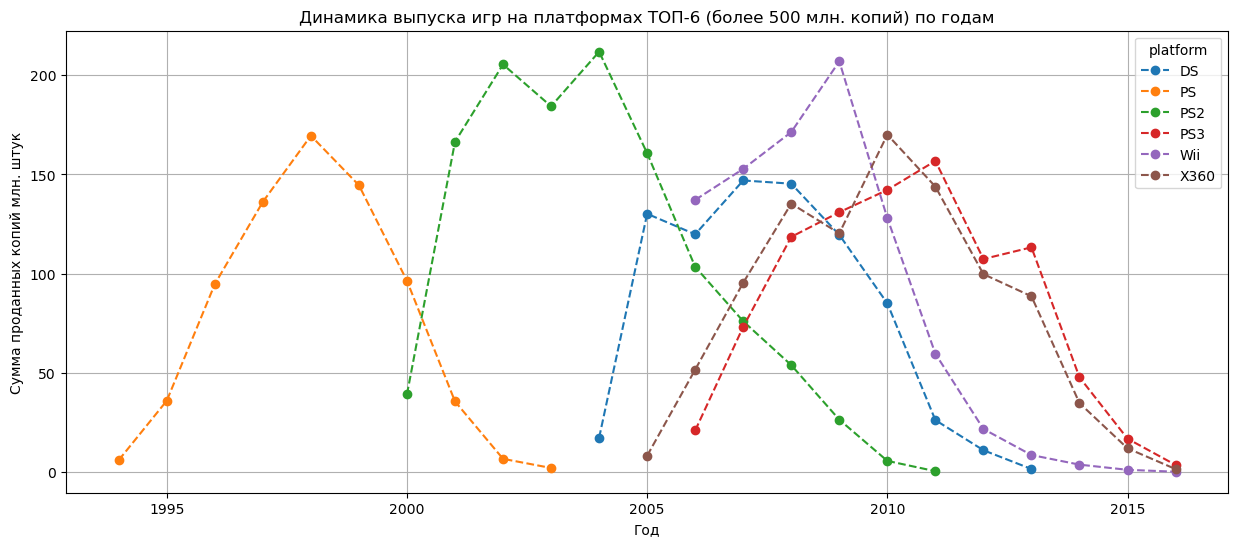

In [34]:
df.query('platform in ["PS2", "X360", "Wii", "PS3","DS", "PS"]').pivot_table(index='year_of_release', 
                           columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика выпуска игр на платформах ТОП-6 (более 500 млн. копий) по годам')
plt.xlabel('Год')
plt.ylabel('Сумма проданных копий млн. штук')

На графике приведена динамика продаж платформ, с наибольшими суммарными продажами.

Пиковые значения проданных копий за 1 год превышают 200 млн. копий.

В среднем продажи по платформам с наибольшими сумарными продажами происходят втечении 9 лет. После 9 лет суммарные продажи стремятся к 0.
В среднем через 4 года исчезают старые платформы.

Как правило, через 4-6 лет на рынок выходит новая игровая платформа.

Теперь выведем 1-ую часть 6 игр по объему продаж (от 100 до 500 млн. штук)

Text(0, 0.5, 'Сумма проданных копий млн. штук')

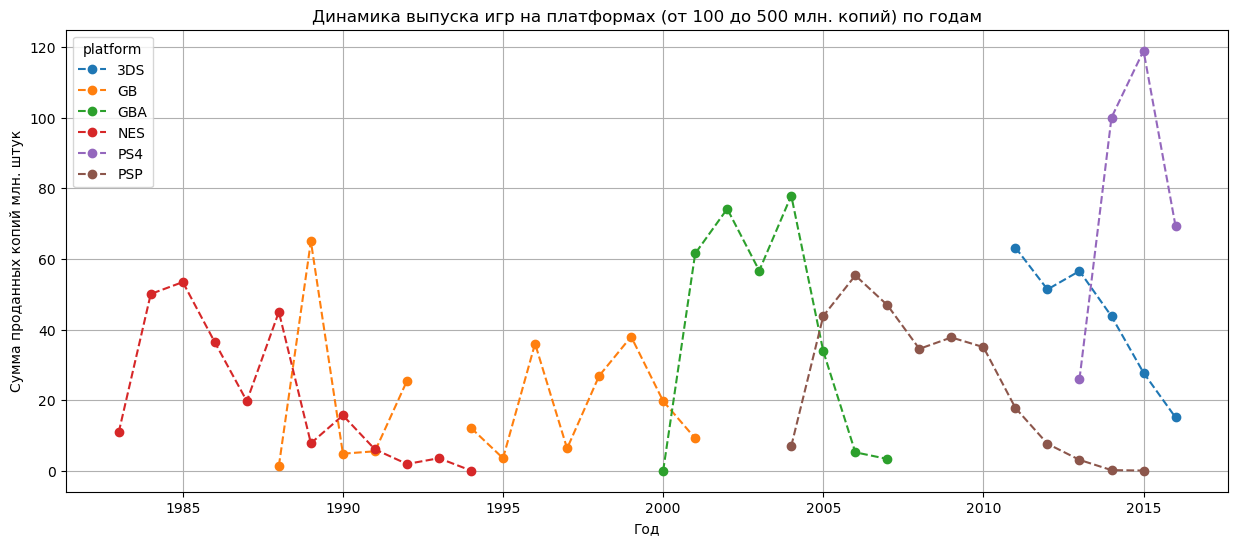

In [35]:
df.query('platform in ["GBA", "PS4", "PSP", "GB","NES", "3DS"]').\
    pivot_table(index='year_of_release', 
                columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика выпуска игр на платформах (от 100 до 500 млн. копий) по годам')
plt.xlabel('Год')
plt.ylabel('Сумма проданных копий млн. штук')

Теперь выведем 2-ую часть 6 игр по объему продаж (от 100 до 500 млн. штук)

Text(0, 0.5, 'Сумма проданных копий млн. штук')

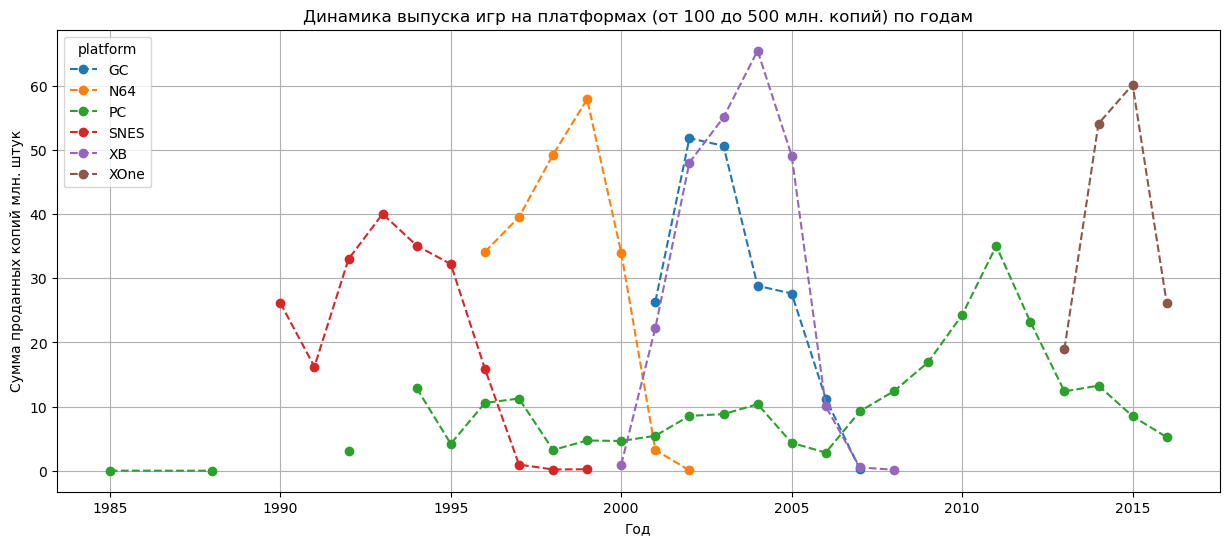

In [36]:
df.query('platform in ["XB", "PC", "N64", "SNES","GC", "XOne"]').\
    pivot_table(index='year_of_release', 
                columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика выпуска игр на платформах (от 100 до 500 млн. копий) по годам')
plt.xlabel('Год')
plt.ylabel('Сумма проданных копий млн. штук')

Ситуация для 3-й шестерки также менее однородная, чем для ТОП-6. При этом следует отметить, что игры на  PC выпускаются более 10 лет и не уходят с рынка. В дальнейшем следует обратить внимание на продажи игр для РС.

Теперь посмотрим динамику продаж по всем платформам.

Text(0, 0.5, 'Сумма проданных копий млн. штук')

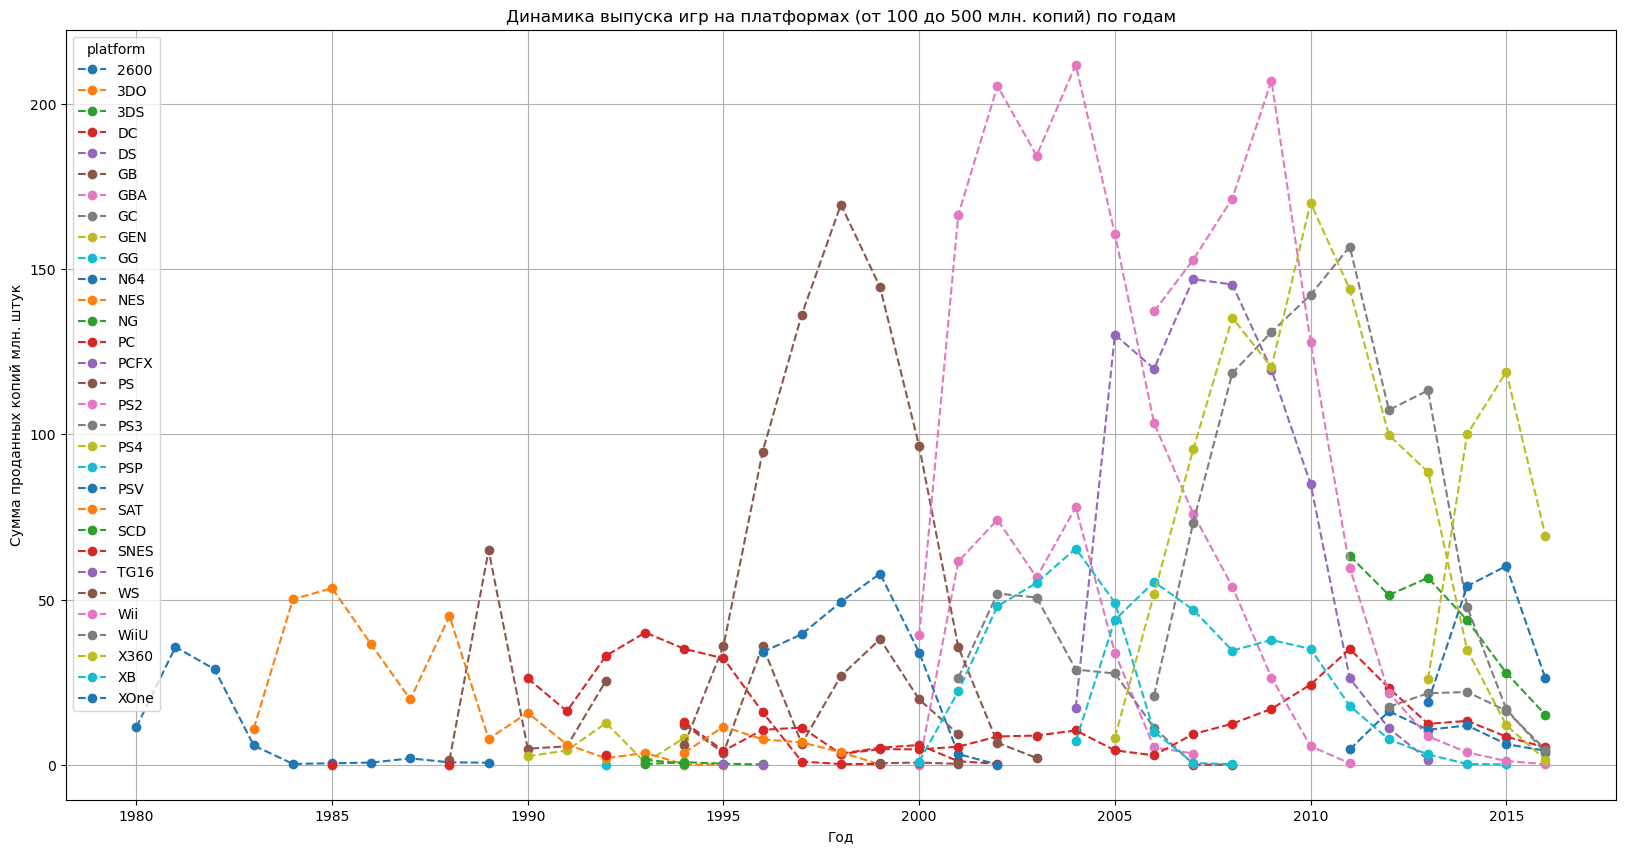

In [37]:
df.pivot_table(index='year_of_release', 
               columns = 'platform',values='all_regions_sales', aggfunc='sum').\
               plot(style='o--', figsize=(20, 10), grid=True)

plt.title('Динамика выпуска игр на платформах (от 100 до 500 млн. копий) по годам')
plt.xlabel('Год')
plt.ylabel('Сумма проданных копий млн. штук')

На основании полученных графиков остается определить актуальный период продаж для последующего анализа. Учитывая что:

1) на общем график рост продаж начинается ориентировочно с 1995 года
2) часть платформ (особенно ТОП-6) перестает существовать к 2013 годун

то в качестве **актуального периода** для прогноза продаж на 2017 год возьмем данные с **2013** по **2016 год**.

Text(0, 0.5, 'Сумма проданных копий млн. штук')

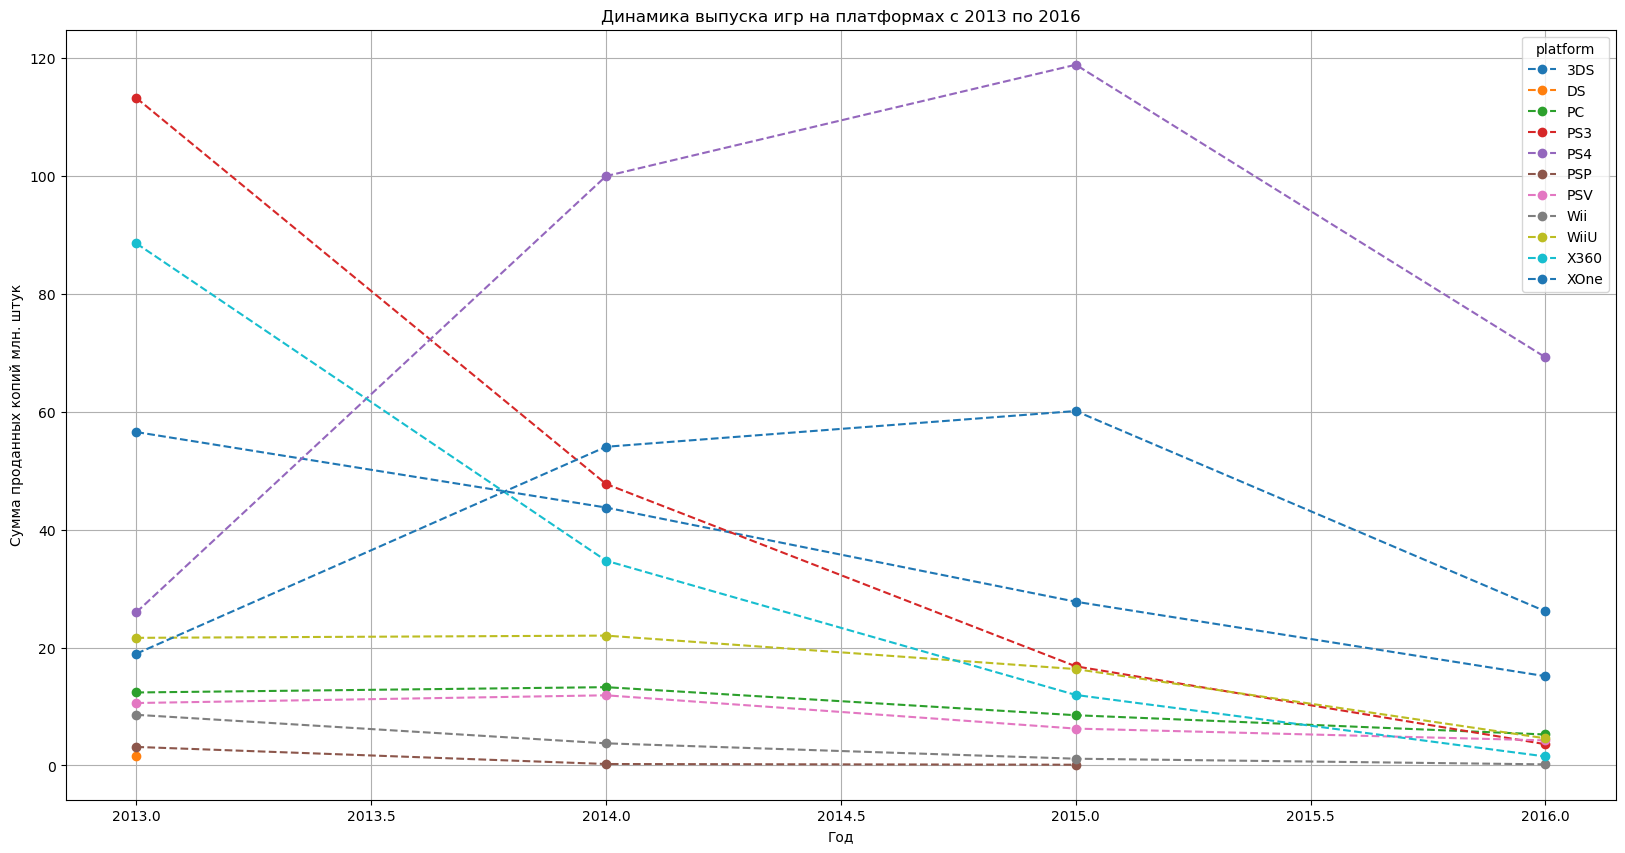

In [38]:
actual_platforms= df.query('year_of_release >= 2013')

actual_platforms.pivot_table(index='year_of_release', 
                columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                plot(style='o--', figsize=(20, 10), grid=True)

plt.title('Динамика выпуска игр на платформах с 2013 по 2016')
plt.xlabel('Год')
plt.ylabel('Сумма проданных копий млн. штук')

**Вывод 3.1.** На основании полученных графиков видно, что:

1) За актуальный период (2013-2016) по объему продаж лидируют "PS4", "XOne".

2) Значительно падают  продажи у платформ "PS3", "X360", 3DS. Вероятно, это связано с выпуском новых платформ от данных компаний и ожидания новых игр

3) Следует отметить относительную стабильность в продажах (с небольшим снижением) у РС.

Следовательно, можно предположить, что наиболее потенциально прибыльными платформами при построении прогноза на 2017 год будут PS4, XOne, PC.

Построим график ящик с усами для разбивки по платфомрам.

Text(0, 0.5, 'Сумма проданных копий млн. штук')

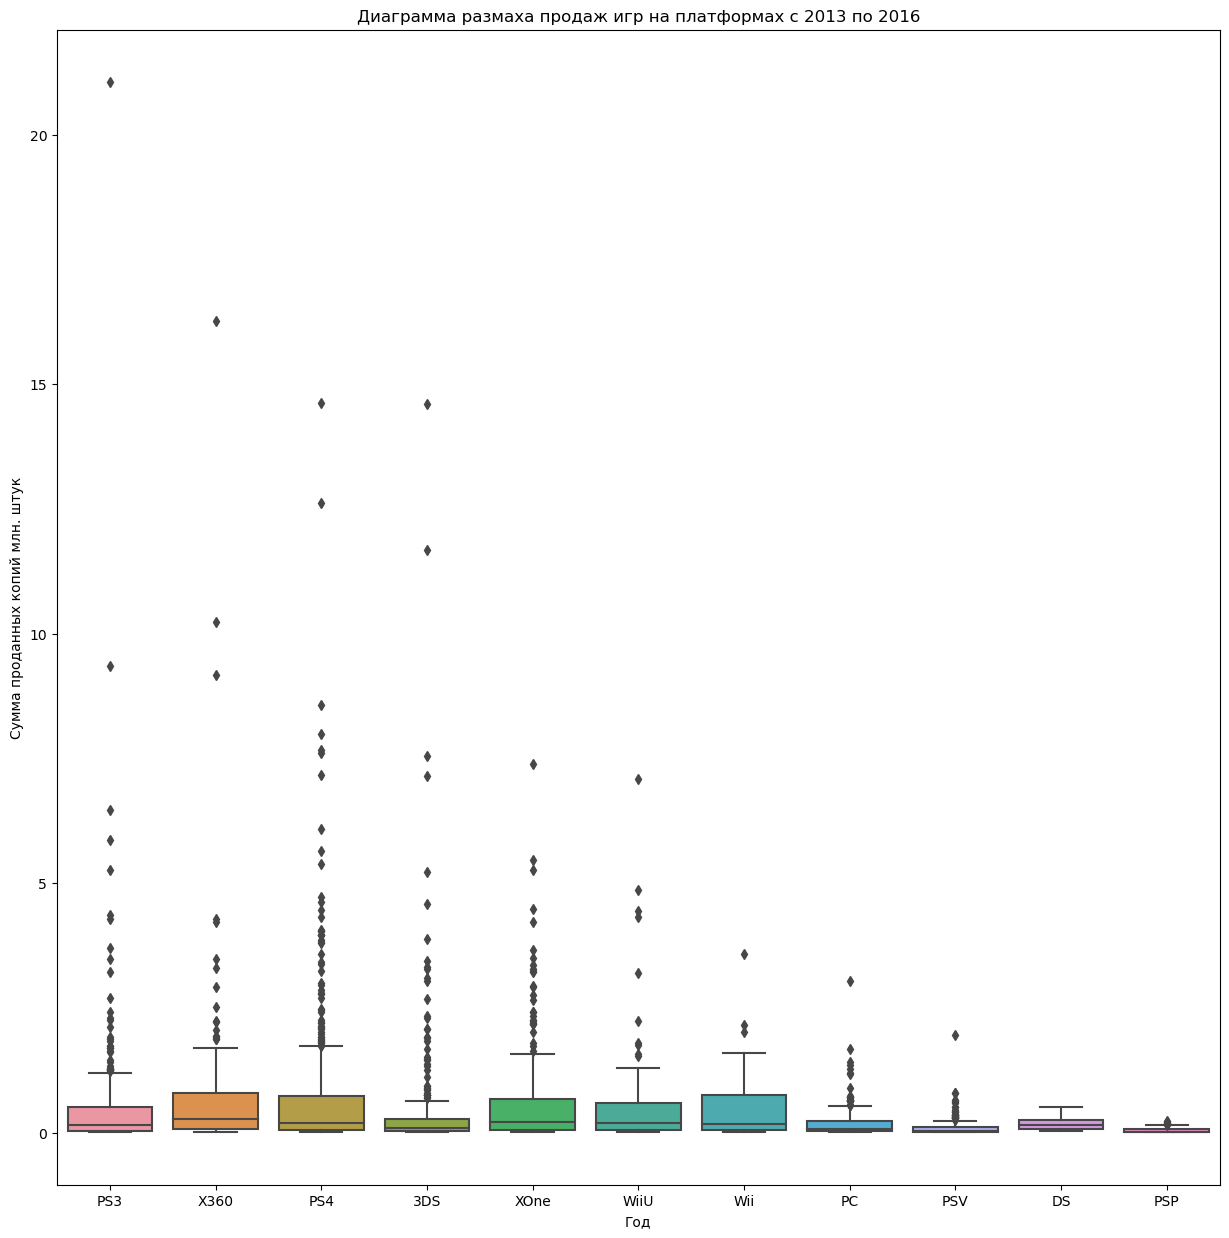

In [39]:
plt.figure(figsize=(15, 15))
sns.boxplot(data = actual_platforms, y = 'all_regions_sales', x='platform').set(title = 'Глобальные продажи по платформам',
                                                                        xlabel = 'Платформы',
                                                                        ylabel = 'Общие продажи')

plt.title('Диаграмма размаха продаж игр на платформах с 2013 по 2016')
plt.xlabel('Год')
plt.ylabel('Сумма проданных копий млн. штук')

Теперь приведем к более масштабируемому выводу и отсечем выбросы на графике.

Text(0, 0.5, 'Сумма проданных копий млн. штук')

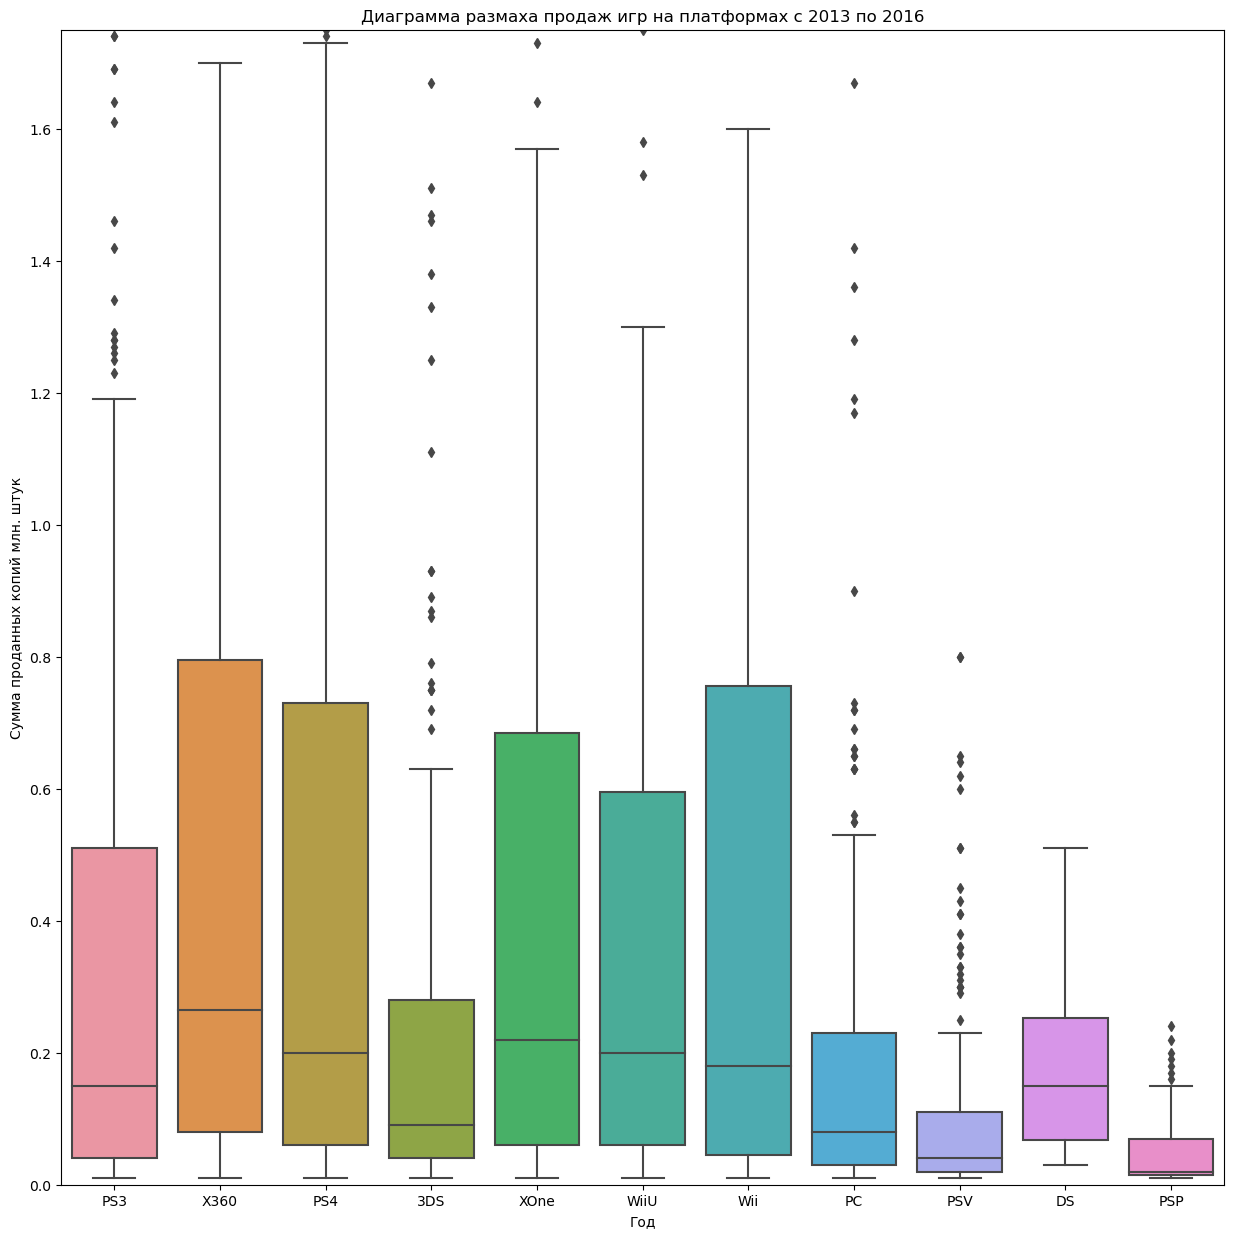

In [40]:
plt.figure(figsize=(15, 15))
sns.boxplot(data = actual_platforms, y = 'all_regions_sales', x='platform').set(title = 'Глобальные продажи по платформам',
                                                                        xlabel = 'Платформы',
                                                                        ylabel = 'Общие продажи')
plt.ylim(0,1.75)
plt.title('Диаграмма размаха продаж игр на платформах с 2013 по 2016')
plt.xlabel('Год')
plt.ylabel('Сумма проданных копий млн. штук')

Из данных видно, что самыми популянрными за актуальный период платформами являтются PS3, X360, PS4, XOne, WiiU, Wii.

In [41]:
actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Рассмотрим, как  влияют на продажи внутри популярной платформы, отзывы пользователей и критиков.

Для начала возьмем одну популярную платформу. Например,PS4. 


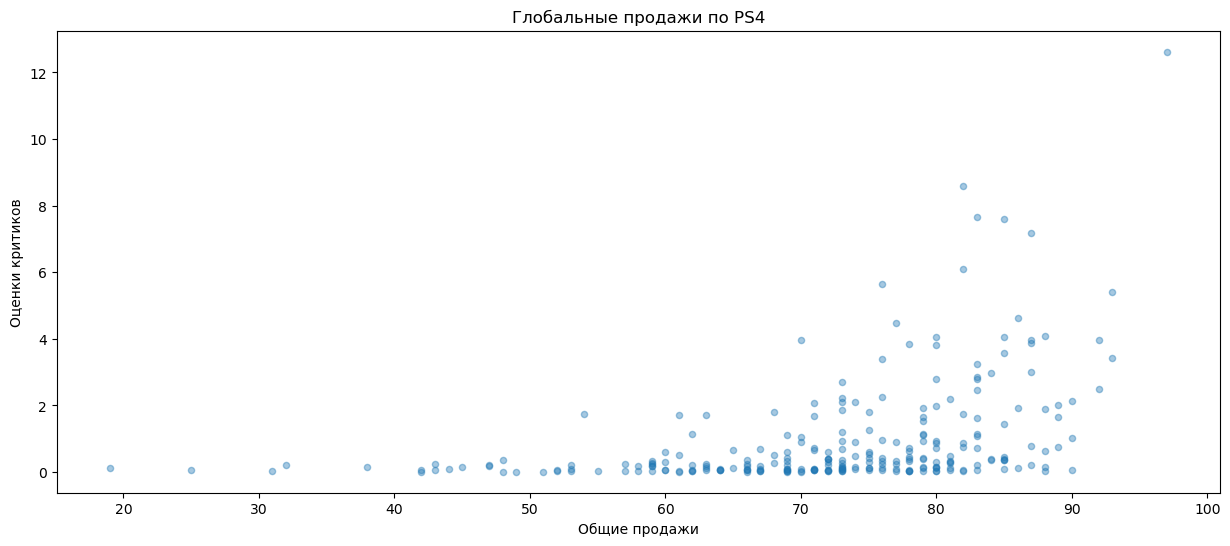

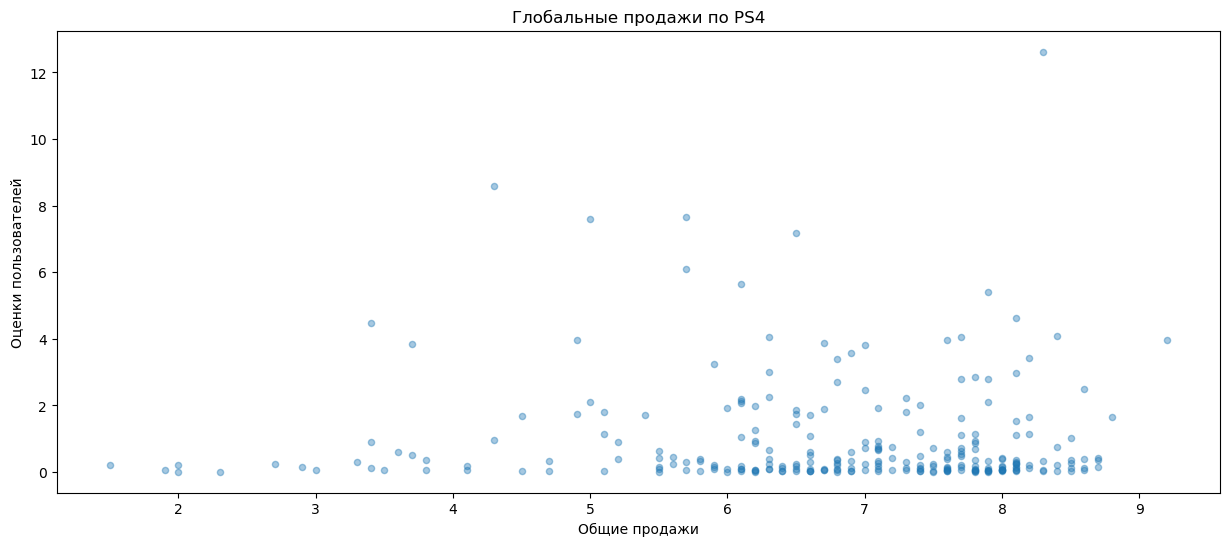

In [42]:
ps4_platform = actual_platforms.query('platform == "PS4"').reset_index()

ps4_critic=ps4_platform.plot(x='critic_score',y='all_regions_sales',kind='scatter',alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по PS4',
         xlabel = 'Общие продажи',
         ylabel = 'Оценки критиков')
plt.show()
ps4_users=ps4_platform.plot(x='user_score',y='all_regions_sales',kind='scatter',alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по PS4',
         xlabel = 'Общие продажи',
         ylabel = 'Оценки пользователей')
plt.show()

In [43]:
ps4_corr_critic = ps4_platform['critic_score'].corr(ps4_platform['all_regions_sales'])

ps4_corr_user = ps4_platform['user_score'].corr(ps4_platform['all_regions_sales'])
print(f'Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе PS4 = {ps4_corr_critic}')
print(f'Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе PS4 = {ps4_corr_user}')

Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе PS4 = 0.4065679020617815
Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе PS4 = -0.031957110204556466


**Вывод 3.2.** Зависимость между оценками критиков и общими продажами игр по платформе PS4 не является линейной (корреляция слабая), при этом наблюдается тренд: при увеличении оценки критиков, увеличивается число продаж копий игр. 

Тажке следует отметить, что практически остутсвует зависимоть между оценками пользователей и общими продажами.

Проверим остальные платформы.

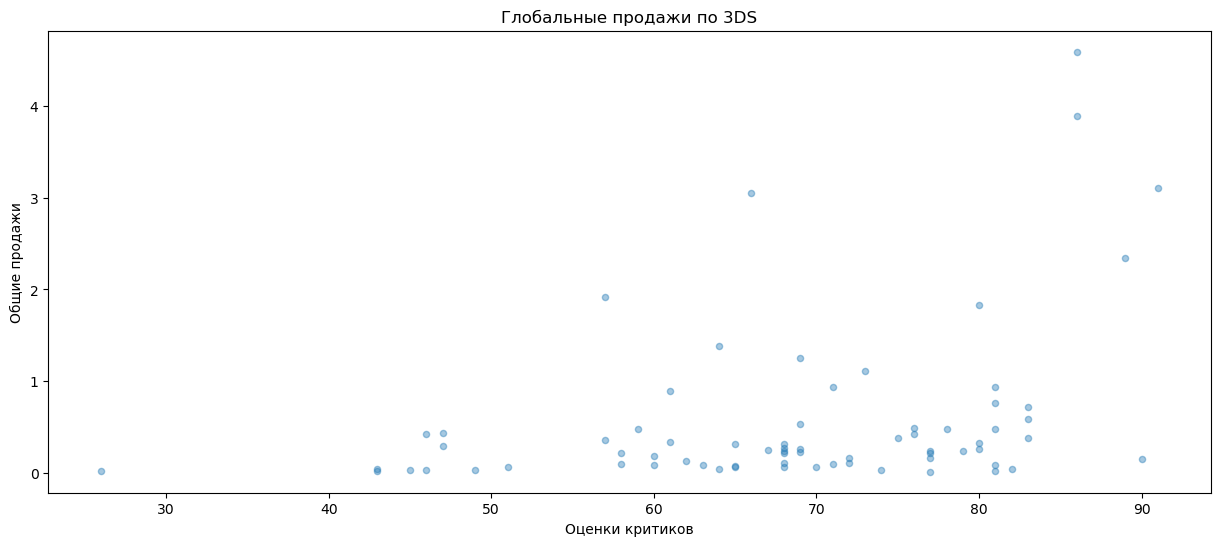

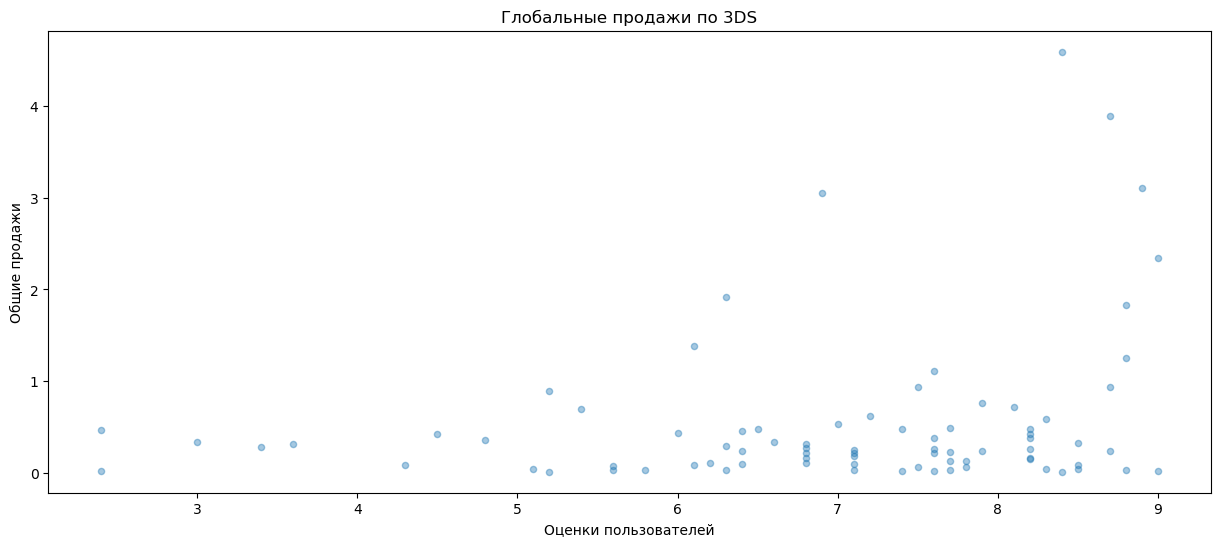

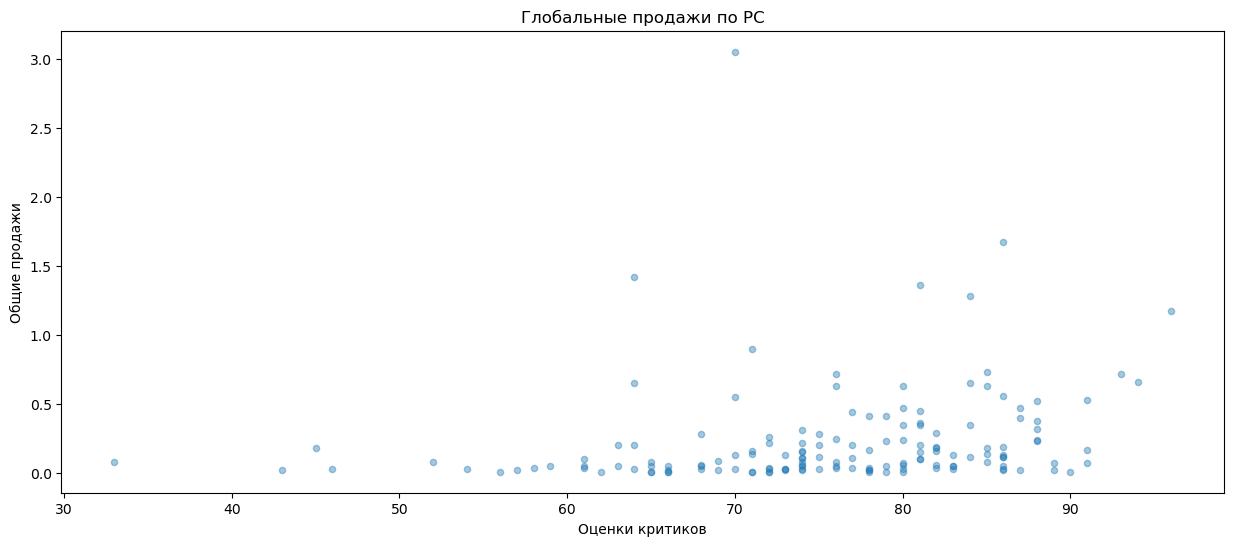

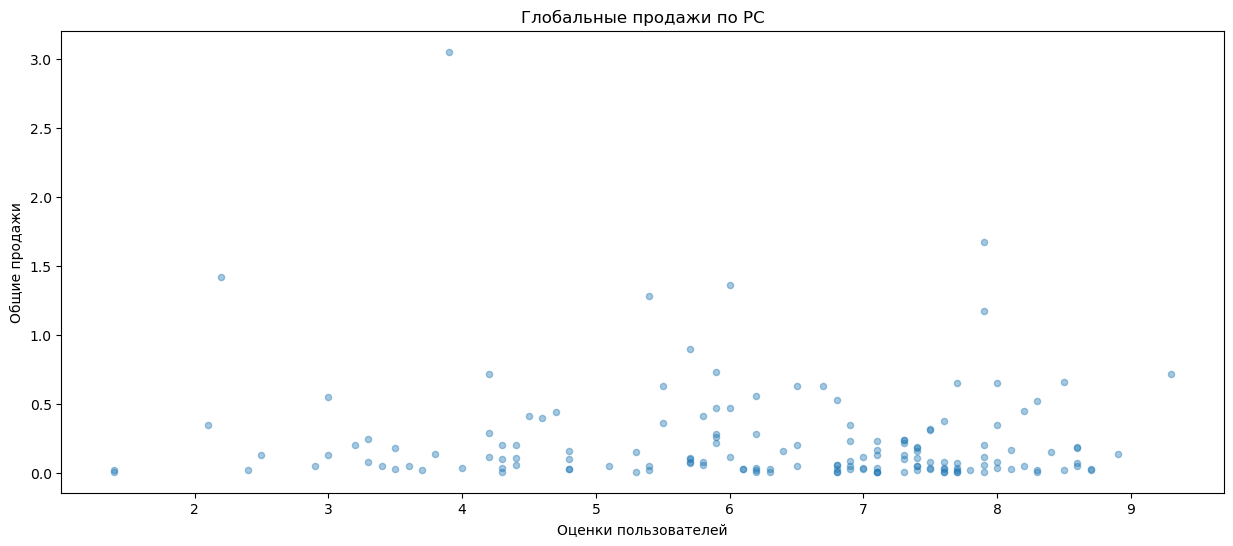

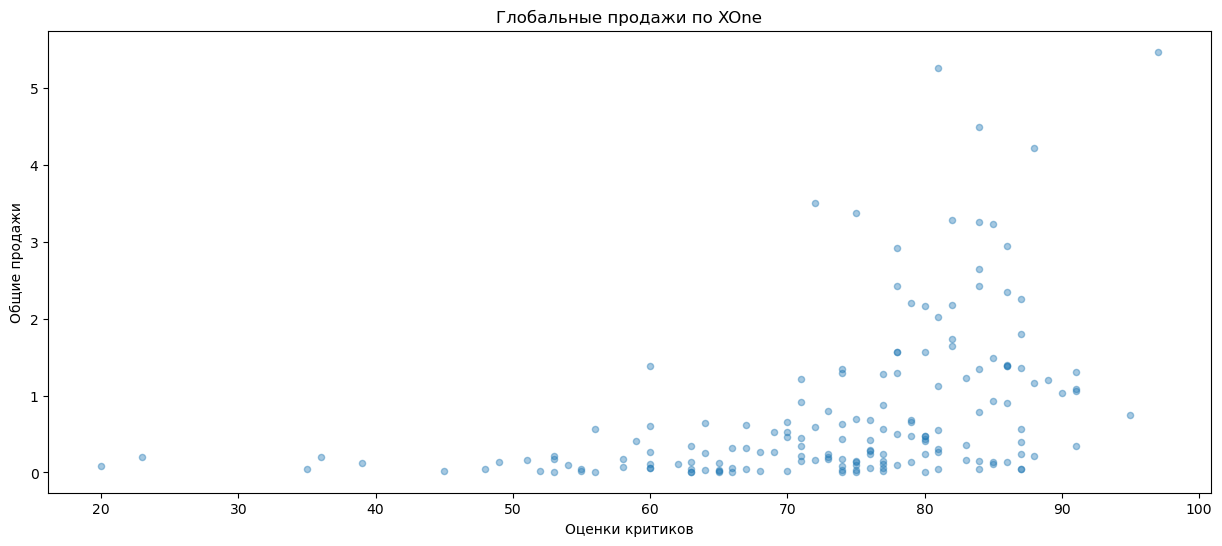

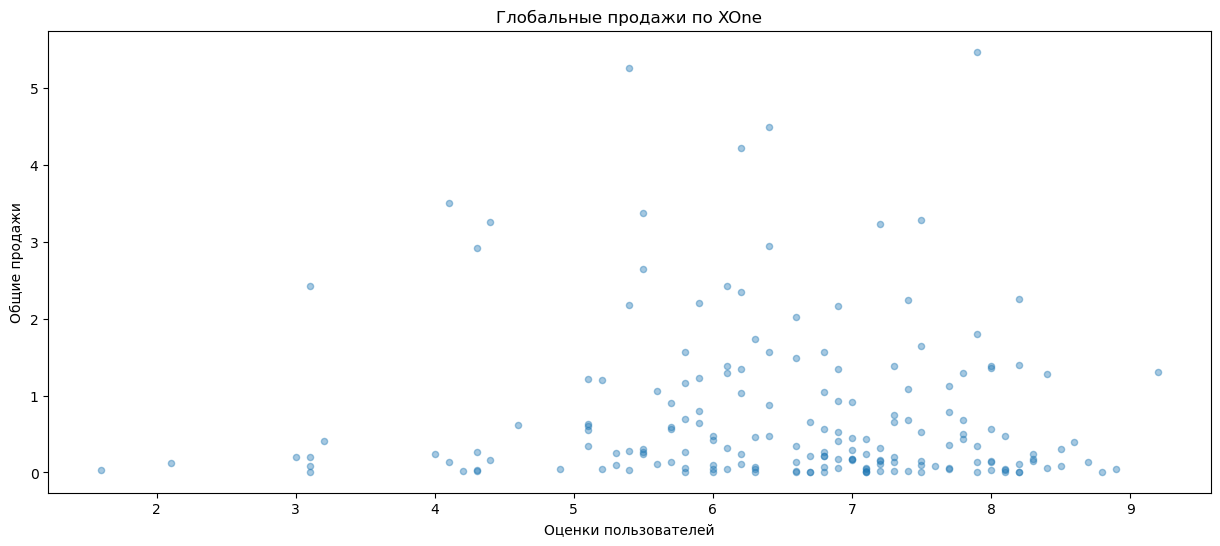

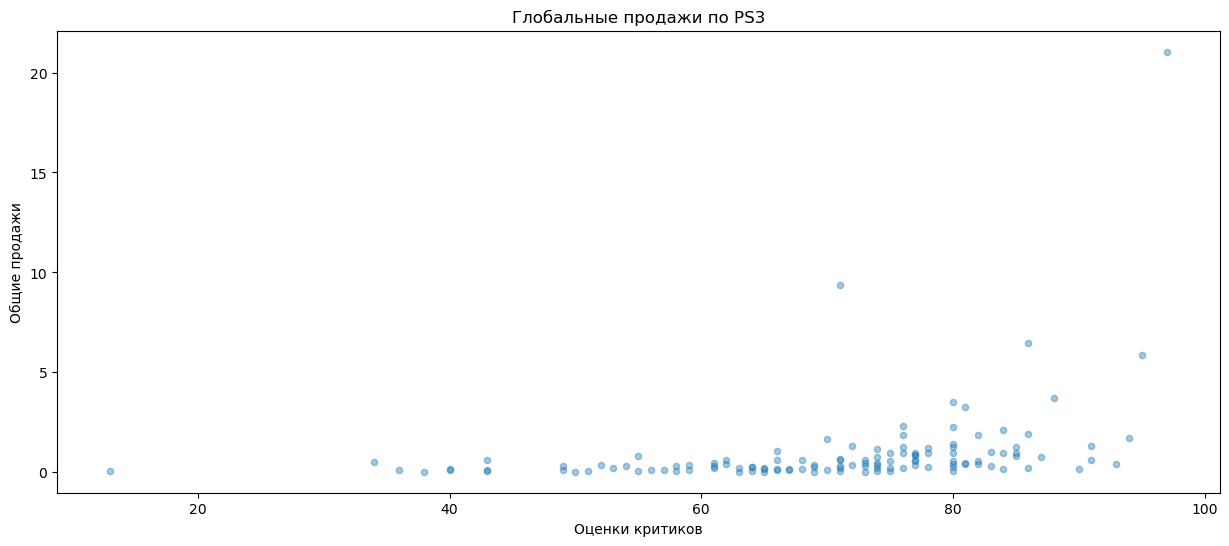

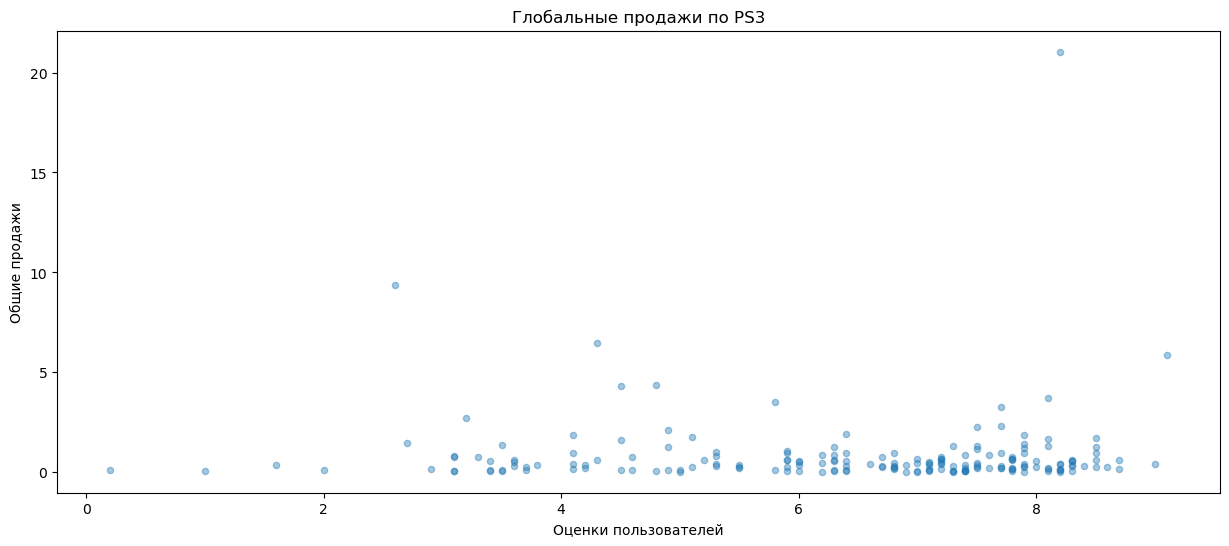

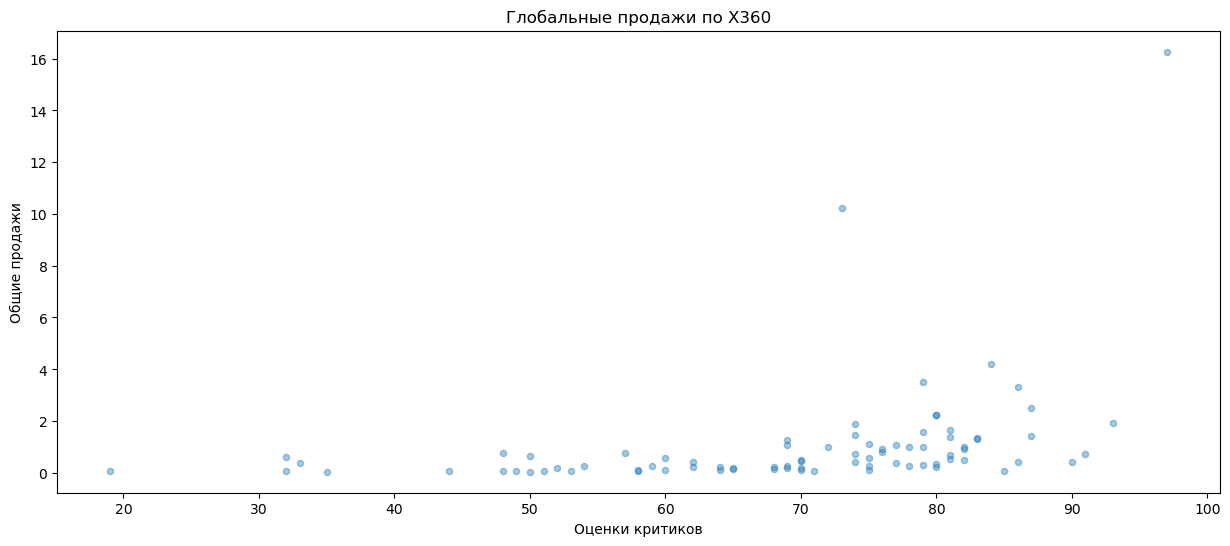

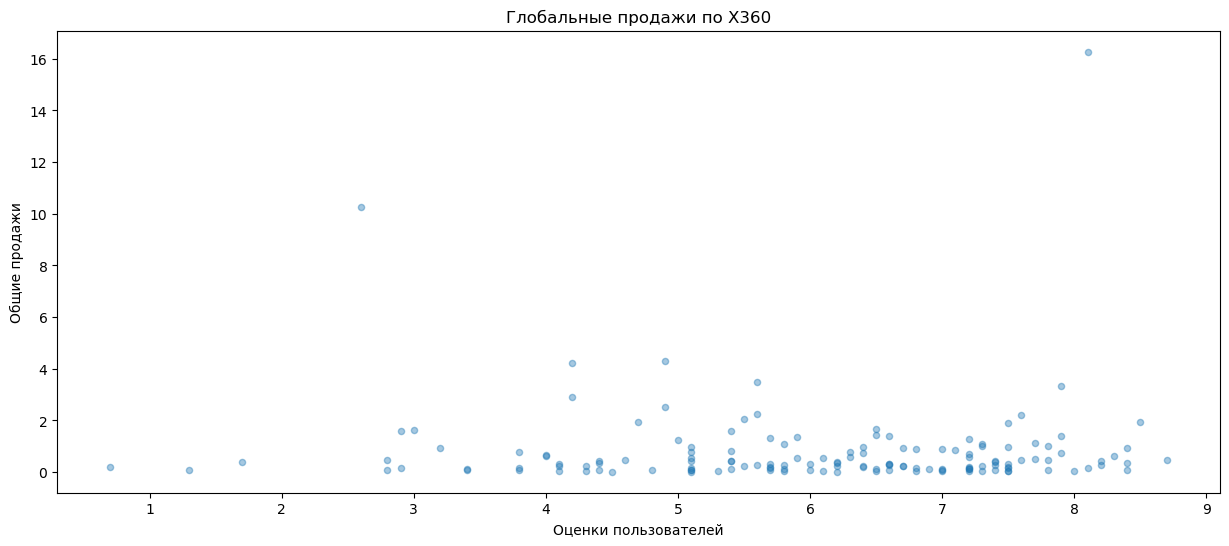

In [44]:
three_ds_platform = actual_platforms.query('platform == "3DS"').reset_index()
pc_platform = actual_platforms.query('platform == "PC"').reset_index()
x_one_platform = actual_platforms.query('platform == "XOne"').reset_index()
ps_3_platform = actual_platforms.query('platform == "PS3"').reset_index()
x_360_platform = actual_platforms.query('platform == "X360"').reset_index()

three_ds_critic = three_ds_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по 3DS', 
                                                                         xlabel = 'Оценки критиков',
                                                                         ylabel = 'Общие продажи')
plt.show()
three_ds_users = three_ds_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по 3DS', 
                                                                         xlabel = 'Оценки пользователей',
                                                                         ylabel = 'Общие продажи')
plt.show()
pc_critic = pc_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по PC', 
                                                                         xlabel = 'Оценки критиков',
                                                                         ylabel = 'Общие продажи')
plt.show()

pc_users = pc_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по PC', 
                                                                         xlabel = 'Оценки пользователей',
                                                                         ylabel = 'Общие продажи')
plt.show()
x_one_critic = x_one_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по XOne', 
                                                                         xlabel = 'Оценки критиков',
                                                                         ylabel = 'Общие продажи')
plt.show()

x_one_users = x_one_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по XOne', 
                                                                         xlabel = 'Оценки пользователей',
                                                                         ylabel = 'Общие продажи')


plt.show()
ps_3_critic = ps_3_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по PS3', 
                                                                         xlabel = 'Оценки критиков',
                                                                         ylabel = 'Общие продажи')
plt.show()

ps_3_user = ps_3_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по PS3', 
                                                                         xlabel = 'Оценки пользователей',
                                                                         ylabel = 'Общие продажи')

plt.show()
x_360_critic = x_360_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по X360', 
                                                                         xlabel = 'Оценки критиков',
                                                                         ylabel = 'Общие продажи')
plt.show()

x_360_users = x_360_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Глобальные продажи по X360', 
                                                                         xlabel = 'Оценки пользователей',
                                                                         ylabel = 'Общие продажи')



Посчитаем коэфициенты корреляции.

In [45]:
three_ds_corr_critic = three_ds_platform['critic_score'].corr(three_ds_platform['all_regions_sales'])
three_ds_corr_user = three_ds_platform['user_score'].corr(three_ds_platform['all_regions_sales'])
pc_corr_critic = pc_platform['critic_score'].corr(pc_platform['all_regions_sales'])
pc_corr_user = pc_platform['user_score'].corr(pc_platform['all_regions_sales'])
x_one_corr_critic = x_one_platform['critic_score'].corr(x_one_platform['all_regions_sales'])
x_one_corr_user = x_one_platform['user_score'].corr(x_one_platform['all_regions_sales'])
ps_3_corr_critic = ps_3_platform['critic_score'].corr(ps_3_platform['all_regions_sales'])
ps_3_corr_user = ps_3_platform['user_score'].corr(ps_3_platform['all_regions_sales'])
x_360_corr_critic = x_360_platform['critic_score'].corr(x_360_platform['all_regions_sales'])
x_360_corr_user = x_360_platform['user_score'].corr(x_360_platform['all_regions_sales'])


print(f'Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе 3DS = {three_ds_corr_critic}')
print(f'Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе 3DS = {three_ds_corr_user}')
print('')
print(f'Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе PC = {pc_corr_critic}')
print(f'Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе PC = {pc_corr_user}')
print('')
print(f'Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе XOne = {x_one_corr_critic}')
print(f'Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе XOne = {x_one_corr_user}')
print('')
print(f'Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе PS3 = {ps_3_corr_critic}')
print(f'Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе PS3 = {ps_3_corr_user}')
print('')
print(f'Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе X360 = {x_360_corr_critic}')
print(f'Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе X360 = {x_360_corr_user}')

Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе 3DS = 0.3570566142288104
Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе 3DS = 0.2415041177356302

Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе PC = 0.1960302829436937
Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе PC = -0.09384186952476745

Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе XOne = 0.4169983280084016
Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе XOne = -0.06892505328279419

Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платформе PS3 = 0.33428533933719196
Коэфициеет корреляции между оценками пользователей и суммарными продажами игр на платформе PS3 = 0.002394402735756673

Коэфициеет корреляции между оценками критиков и суммарными продажами игр на платф

**Вывод 3.3.**

Зависимость у всех платформ не является линеной, при этом наблюдается следующий тренд: чем выше оценка критиков, тем выше продажи. 

Также следует отметить что отсутствует зависимость между оценками пользователей и продажами игр. Слабовыраженна данная зависимость у платформы 3DS.

**Жанры**

Рассмотрим, какие жанрые являются наиболее популярными у перспективных и всех остальных платформ.

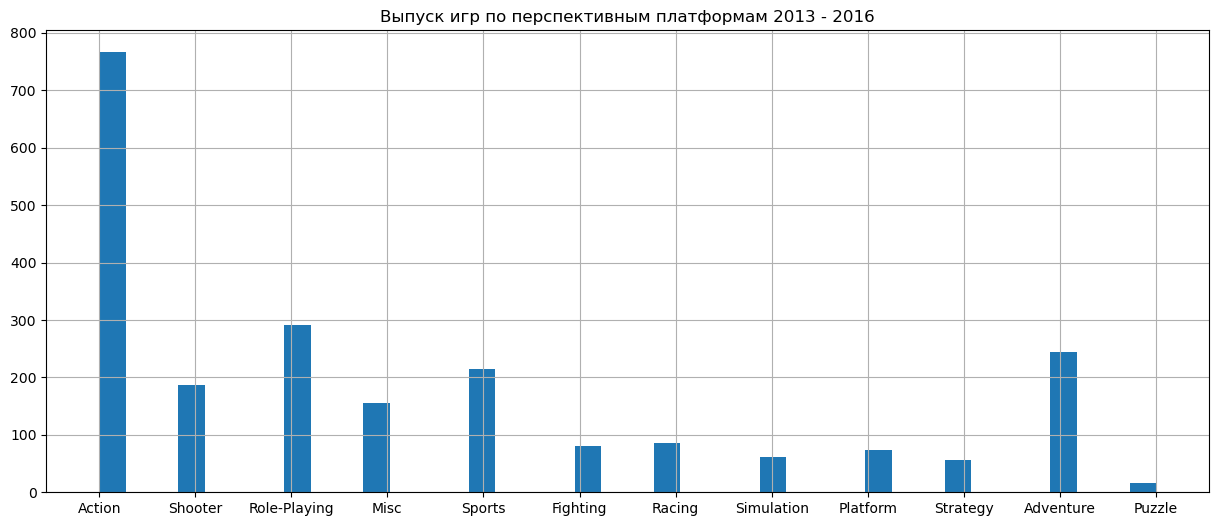

In [46]:
actual_platforms['genre'].hist(bins=40, figsize=(15,6))
plt.grid(True)
plt.title('Выпуск игр по перспективным платформам 2013 - 2016')
plt.show()

Дополнительно для проверки построим диаграму размаха для жанров.

Text(0, 0.5, 'Сумма проданных копий млн. штук')

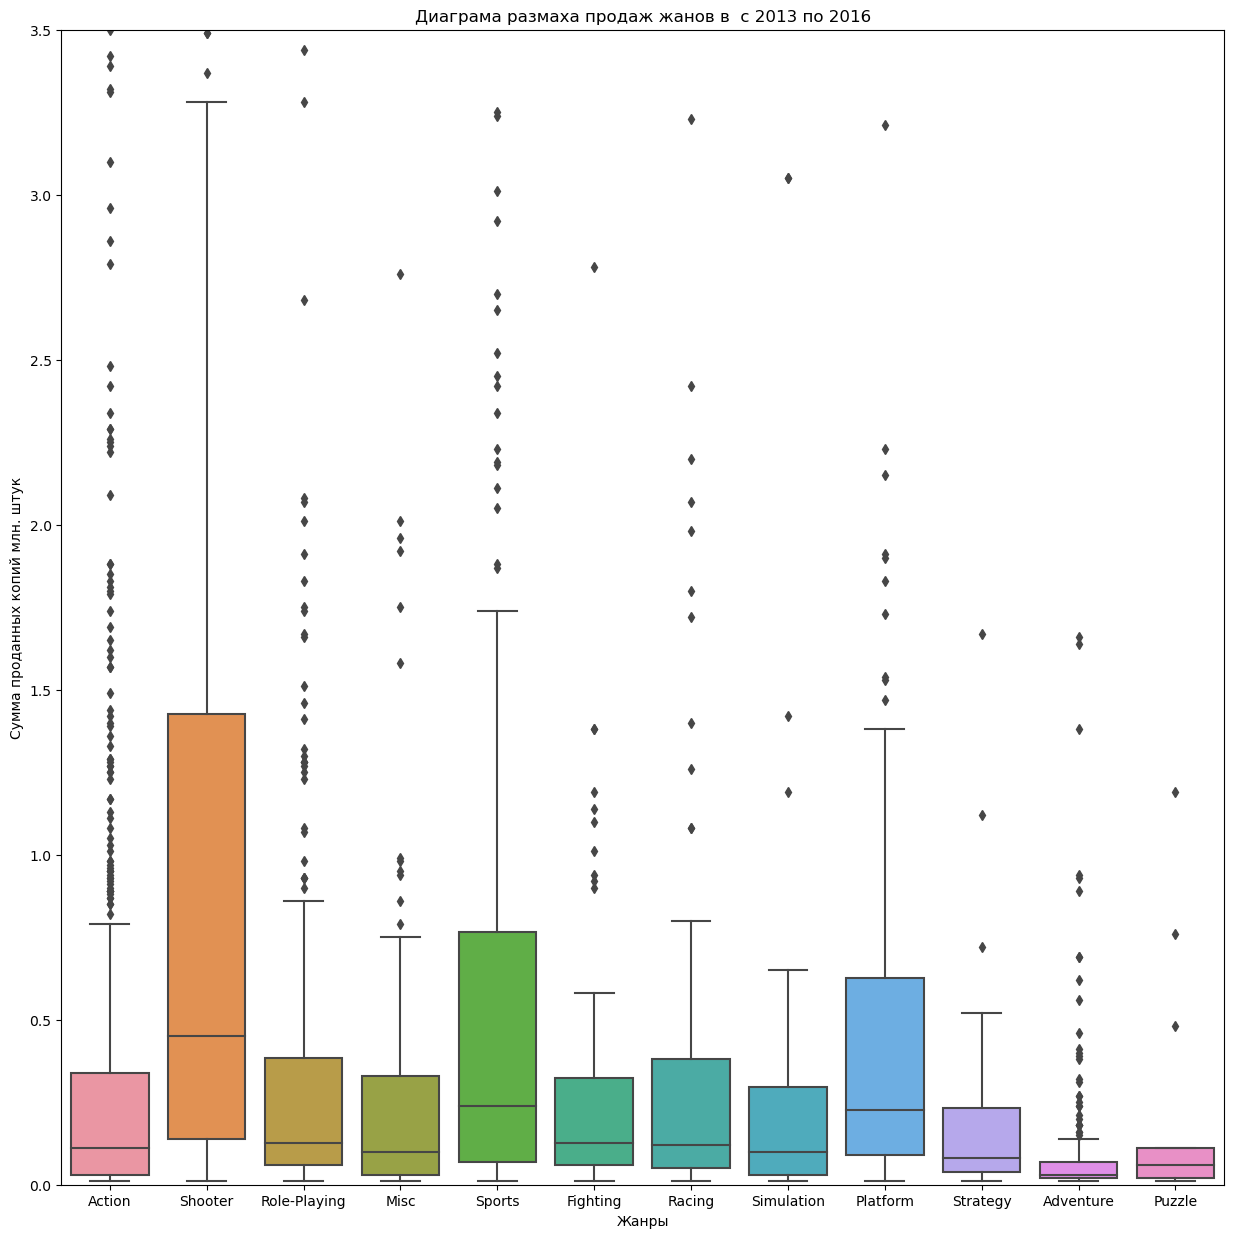

In [47]:
plt.figure(figsize=(15, 15))
sns.boxplot(data = actual_platforms, y = 'all_regions_sales', x='genre').set(title = 'Глобальные продажи по жанрам',
                                                                        xlabel = 'Жанры',
                                                                        ylabel = 'Общие продажи')
plt.ylim(0, 3.5)
plt.title('Диаграма размаха продаж жанов в  с 2013 по 2016')
plt.xlabel('Жанры')
plt.ylabel('Сумма проданных копий млн. штук')

**Вывод 3.4.**

1) ТОП-5 жанров для перспективных платформ: Action, Shooter, Sports, Role-Playing, Adventure.

2) При этом наиболее стабилные прожажи (медианные значения) у жанров Shooter, Sports, Platforms. Можно предположить, что на данные жанры имеется стабильный спрос.

3) Низкие продажи игр в жанре Puzle.

## 4. Анализ пользователей по регионам продаж.

Теперь рассмотрим непосредственно рынки сбыта игр.

Для начала рассмотрим, какие платформы являются популярными в различных регионах.

Выведем топ-5 платформ в регионах продаж.

In [48]:
actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20


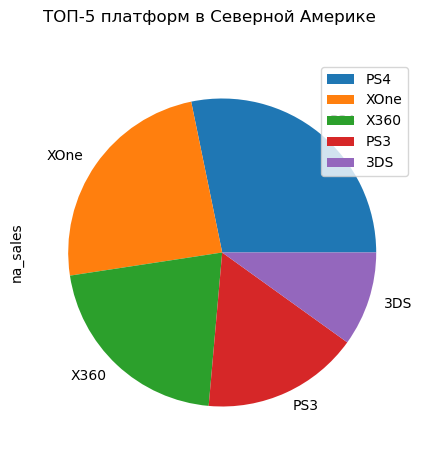

In [49]:
top_5_in_na =  actual_platforms.pivot_table(index='platform',
                                                    values='na_sales',
                                                    aggfunc='sum').sort_values(by='na_sales',ascending=False).head()
print(top_5_in_na)
top_5_in_na.plot(kind='pie', subplots=True, title='ТОП-5 платформ в Северной Америке', figsize=(10,5))
plt.show()

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96


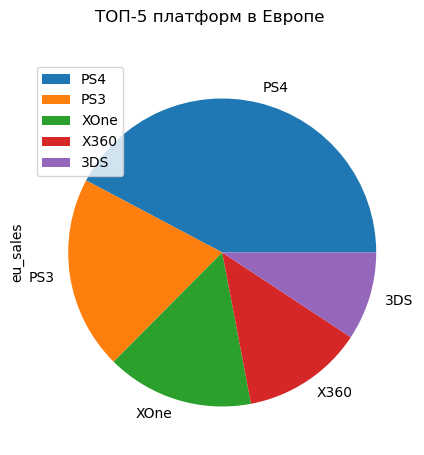

In [50]:
top_5_in_eu =  actual_platforms.pivot_table(index='platform',
                                                    values='eu_sales',
                                                    aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

print(top_5_in_eu)
top_5_in_eu.plot(kind='pie', subplots=True, title='ТОП-5 платформ в Европе', figsize=(10,5))
plt.show()

          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


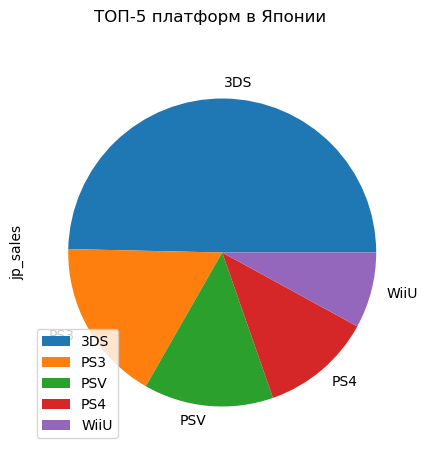

In [51]:
top_5_in_jp =  actual_platforms.pivot_table(index='platform',
                                                    values='jp_sales',
                                                    aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()
print(top_5_in_jp)
top_5_in_jp.plot(kind='pie', subplots=True, title='ТОП-5 платформ в Японии', figsize=(10,5))
plt.show()

**Вывод 4.1.**
По приведенным данным можно отметить, что во всех 3-х регионах наибольшей популярностью пользуются консоли. Компьютеры появляются в ТОП-5 на европейском рынке.
Платформы PS3, PS4 во всех регионах входят в ТОП-3.

Рассмотрим как распределены жанры по рынкам сбыта.

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49


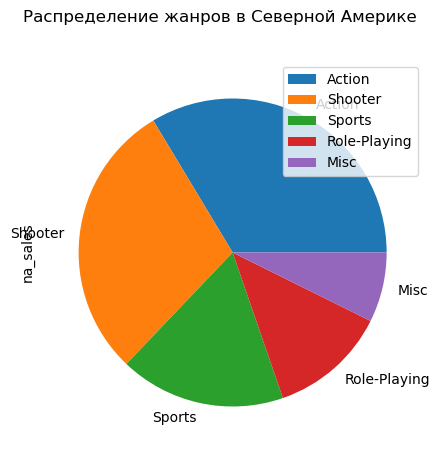

In [52]:
top_5_gen_in_na =  actual_platforms.pivot_table(index='genre',
                                                    values='na_sales',
                                                    aggfunc='sum').sort_values(by='na_sales',ascending=False).head()
print(top_5_gen_in_na)

top_5_gen_in_na.plot(kind='pie', subplots=True, title='Распределение жанров в Северной Америке', figsize=(10,5))
plt.show()

              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19


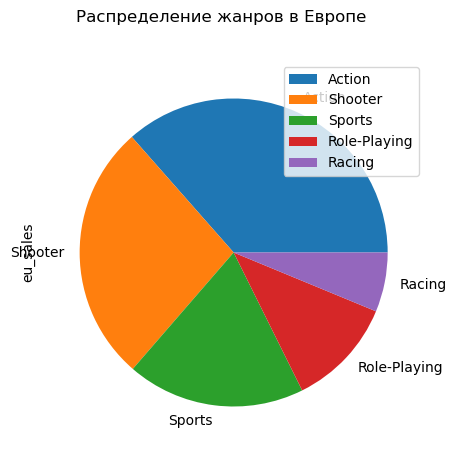

In [53]:
top_5_gen_in_eu =  actual_platforms.pivot_table(index='genre',
                                                    values='eu_sales',
                                                    aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()
print(top_5_gen_in_eu)

top_5_gen_in_eu.plot(kind='pie', subplots=True, title='Распределение жанров в Европе', figsize=(10,5))
plt.show()

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


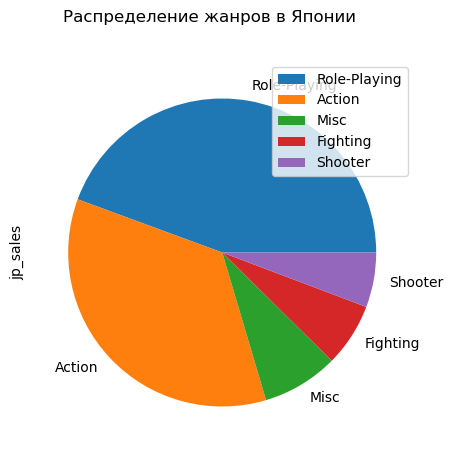

In [54]:
top_5_gen_in_jp =  actual_platforms.pivot_table(index='genre',
                                                    values='jp_sales',
                                                    aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()
print(top_5_gen_in_jp)
top_5_gen_in_jp.plot(kind='pie', subplots=True, title='Распределение жанров в Японии', figsize=(10,5))
plt.show()

**Вывод 4.2.**
Топ-3 в Северной Америке и Европе полностью совпадают. Самый популярный жанр во всех регионаох - Action.

Картина на Японском рынке значительно отличается от Америки и Европы.

Рассмотрим влияние ESRB рейтинга на продажи в регионах.

rating,E,E10+,M,T,unknown_rating
eu_sales,83.36,42.69,145.32,41.95,78.91
jp_sales,15.14,5.89,14.11,20.59,85.05
na_sales,79.05,54.24,165.21,49.79,89.42


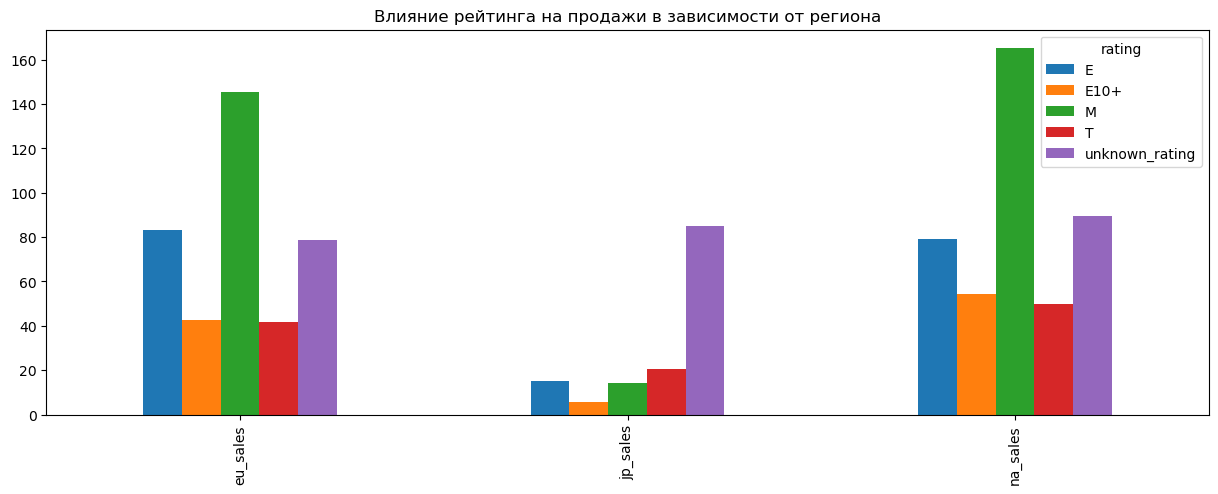

In [55]:
sales_rating=(actual_platforms
                        .pivot_table(columns = 'rating', \
                                     values=('na_sales','eu_sales', 'jp_sales'), aggfunc='sum' ));

display(sales_rating)

sales_rating.plot(kind='bar', figsize=(15,5),title='Влияние рейтинга на продажи в зависимости от региона');

Как было отмечено ранее, рейтинг ESRB наиболее распространен в США и Канаде.

Следует отметить, что картина по влиянию рейтинга ESRB в Северной Америке и Европе имеют схожий тренд.
Вероятно, это связано с тем, что возрастная группа и предпочтения "западной публики" похожи.

В свою очередь, для Японии картина отличается: объем продаж игр с рейтингом ESRB в разы ниже, чем в Северной Америке и Европе.
Вероятно, это связано с тем, что в Японии наиболее популярны игры, не попадающие под классификацию  рейтинга ESRB.



**Вывод. 4.3.**

1) В Америке и Европе самые большие продажи у игр с рейтингом ESRB (возрастными группами) М и Е.

2) В Японии влияния рейтинга ESRB на продажи незначительно. Можно предположить, что в Японии объем продаж ниже или данный рейтинг для Японии нерелевантен. Поэтому для дополнительного анализа потребуется дополнительная выгрузка по пропущенным данным.

3) Неизвестный рейтинг также занимает значительную долю в Северной Америке и в Европе, что подтверждает необходимость дополнительной выгрузки, а не только ESRB.

In [56]:
temp = actual_platforms.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknown_rating    977
M                 369
T                 333
E                 302
E10+              252
Name: rating, dtype: int64

## 5. Проверка статистических гипотез.

Проверим гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а также что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Так как у нас будет идти сравнение 2-х выборок, то для проверки гипотез будем использовать метод st.ttest.ind()

1. Гипотеза о пользовательских рейтингах Xbox One и PC.

```
H_0: Пользовательский рейтинг Xbox One = Пользовательский рейтинг РС`
H_1: ВПользовательский рейтинг Xbox One  ≠ Пользовательский рейтинг РС`
alpha = 0.05
```


In [57]:
results = st.ttest_ind(
    actual_platforms[(actual_platforms['platform'] =='PC') & (actual_platforms['user_score'] >= 0)]['user_score'], 
    actual_platforms[(actual_platforms['platform'] =='XOne') & (actual_platforms['user_score'] >= 0)]['user_score'], equal_var = False)# results = вызов метода для проверки гипотезы

alpha = .05# 

# вывод значения p-value на экран 
if results.pvalue < alpha:
    print(results.pvalue)
    print("Отвергаем нулевую гипотезу")
else:
    print(results.pvalue)
    print("Не получилось отвергнуть нулевую гипотезу")# условный оператор с выводом строки с ответом

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод 1.** Гипотеза H0 верна. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2. Гипотеза о пользовательских рейтингах жанров Action и Sports.

```
H_0: Пользовательский рейтинг жанра Action = Пользовательский рейтинг жанра Sports`
H_1: ВПользовательский рейтинг жанра Action  ≠ Пользовательский рейтинг жанра Sport`
alpha = 0.05
```


In [58]:
results = st.ttest_ind(
    actual_platforms[(actual_platforms['genre'] =='Action') & (actual_platforms['user_score'] >= 0)]['user_score'], 
    actual_platforms[(actual_platforms['genre'] =='Sports') & (actual_platforms['user_score'] >= 0)]['user_score'], equal_var = False)# results = вызов метода для проверки гипотезы

alpha = .05# 

# вывод значения p-value на экран 
if results.pvalue < alpha:
    print(results.pvalue)
    print("Отвергаем нулевую гипотезу")
else:
    print(results.pvalue)
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод 2.** Пользовательский рейтинг жанра Action отличается от Sports.

## 6. Общие выводы по проекту.

По результатам проведенно исследования отмечено, что:

1. Пик продаж игр во всем мире достигается в период 2008-2009.
2. Продажи игр снижаются с 2010 года. Данный фактор связан с тем, что часть платформ к этому моменту перестает выпускаться. Старые платформы заменяются новымы.
3. Наиболее перспективными и актуальными платформами при планировании продаж на 2017 год являются  PS3, X360, PS4, XOne, WiiU, Wii.
4. Самый большой уровень продаж в 2016 году у PS4.
5. Прямой зависимости между оценками пользователей и продажами игр нет. При этом для всех платформ наблюдается следующий тренд: чем выше оценки критиков, тем выше продажи.
6. Наиболее популярными жанрами являются Action, Shooter, Sports, Role-Playing, Adventure. Наиболее стабильные жанры по продажам : Shooter, Sports, Platform
7. По продажам игр на Американском и Европейском рынке лидируют X360, PS3, PS4, XOne, 3DS.
8. Согласно ESRB рейтингу, наиболее продаваемые игры с рейтингом (возрастной категорией) М, Е.
9. Для Японии и других рынков требуется дополнительная выгрузка по рейтингам, с целью последующего анализа. Влияние рейтинга ESRB в Японии слабо выражено, по сравнению с Северной Америкой и Европой.
10. Пользовательский рейтинг XOne приблизительно равен PC.
11. Пользовательский рейтинг жанра Action не соответствует Sports.

**Заключение.**
Учитывая, что самый большой объем продаж на Американском и Европейском рынке, интернет магазину рекомендуется закупать с целью последующей перепродажи и увеличения продаж:
1) Игры для платформ X360, PS3, PS4, XOne, PC.

2) C жанрами Action, Shooter, Sports, Role-Playing, Adventure

3) С рейтингом ESRB М, Т.

4) Деньги на рекламную компанию в первую очередь нужно направить на продажи в Северной Америке и Европе.